# **IMPORT LIBRARY**

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize as word_tokenize_wrapper
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# **IMPORT DATA**

## **Read Data**

In [2]:
data = pd.read_csv("netflix_reviews.csv")
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,61a10e0d-e868-4d87-aa30-f41d30285a3f,badr mosa,Terrible app I can't watch anything because of...,1,0,8.121.2 build 22 50727,2024-07-08 15:41:17,8.121.2 build 22 50727
1,1a7ce341-afc6-46da-9d08-793582e8ed3c,Ivan Berry,"I love 💕💕 to download it,,😭",5,0,NaN,2024-07-07 17:47:19,NaN
2,1bd445c3-7f36-4717-810a-63c5533207d0,Ryan Murray,Exceptional,5,1,8.121.2 build 22 50727,2024-07-07 12:31:53,8.121.2 build 22 50727
3,59f306cd-852b-4459-b24f-3e4436df8465,Shannon Bonacci,Can't even make it through a full episode of a...,2,2,8.121.2 build 22 50727,2024-07-07 05:21:45,8.121.2 build 22 50727
4,f21a1d8a-2b4c-4385-8aff-ca317a00e032,Katie Hutchinson,Great,5,0,8.26.0 build 11 40221,2024-07-06 19:47:34,8.26.0 build 11 40221


## **Data Information**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113620 entries, 0 to 113619
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              113620 non-null  object
 1   userName              113618 non-null  object
 2   content               113618 non-null  object
 3   score                 113620 non-null  int64 
 4   thumbsUpCount         113620 non-null  int64 
 5   reviewCreatedVersion  96981 non-null   object
 6   at                    113620 non-null  object
 7   appVersion            96981 non-null   object
dtypes: int64(2), object(6)
memory usage: 6.9+ MB


# **DATA PROCESSING**

## **Data Cleaning**

In [4]:
data.isnull().sum()

reviewId                    0
userName                    2
content                     2
score                       0
thumbsUpCount               0
reviewCreatedVersion    16639
at                          0
appVersion              16639
dtype: int64

In [5]:
data = data.dropna()
data.isnull().sum()

reviewId                0
userName                0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
appVersion              0
dtype: int64

## **Duplicate Data**

In [6]:
data_duplicated = data.duplicated().sum()
data_duplicated

226

In [7]:
data = data.drop_duplicates()
data_duplicated = data.duplicated().sum()
data_duplicated

0

In [8]:
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,61a10e0d-e868-4d87-aa30-f41d30285a3f,badr mosa,Terrible app I can't watch anything because of...,1,0,8.121.2 build 22 50727,2024-07-08 15:41:17,8.121.2 build 22 50727
2,1bd445c3-7f36-4717-810a-63c5533207d0,Ryan Murray,Exceptional,5,1,8.121.2 build 22 50727,2024-07-07 12:31:53,8.121.2 build 22 50727
3,59f306cd-852b-4459-b24f-3e4436df8465,Shannon Bonacci,Can't even make it through a full episode of a...,2,2,8.121.2 build 22 50727,2024-07-07 05:21:45,8.121.2 build 22 50727
4,f21a1d8a-2b4c-4385-8aff-ca317a00e032,Katie Hutchinson,Great,5,0,8.26.0 build 11 40221,2024-07-06 19:47:34,8.26.0 build 11 40221
5,bdd267b4-4231-4a5d-b369-3ac9e5082fc5,Mirza Irfan,Your device is not part of the Netflix Househo...,1,0,8.120.0 build 10 50712,2024-07-05 17:09:39,8.120.0 build 10 50712


In [9]:
data['content'].head(10)

0     Terrible app I can't watch anything because of...
2                                           Exceptional
3     Can't even make it through a full episode of a...
4                                                 Great
5     Your device is not part of the Netflix Househo...
6     I've been trying to pay for a month since I cr...
7                                          Kayla Kwadau
8                                      Abdulrhamam Sekh
9                                                  Good
10    Plsssss stoppppp giving screen limit like when...
Name: content, dtype: object

# **TEXT PROCESSING**

## **Case Folding**

In [10]:
def case_folding(text):
    # Convert to lowercase
    text = text.lower()
    return text

data['content'] = data['content'].apply(case_folding)
data['content'].head(10)

0     terrible app i can't watch anything because of...
2                                           exceptional
3     can't even make it through a full episode of a...
4                                                 great
5     your device is not part of the netflix househo...
6     i've been trying to pay for a month since i cr...
7                                          kayla kwadau
8                                      abdulrhamam sekh
9                                                  good
10    plsssss stoppppp giving screen limit like when...
Name: content, dtype: object

## **Cleaning**

In [11]:
def cleaning(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]|[\d]|_', '', text)
    # Remove number
    text = re.sub(r'\d+', '', text)
    # Remove spacing
    text = text.strip()
    return text

data['content'] = data['content'].apply(cleaning)
data['content'].head(10)

0     terrible app i cant watch anything because of ...
2                                           exceptional
3     cant even make it through a full episode of a ...
4                                                 great
5     your device is not part of the netflix househo...
6     ive been trying to pay for a month since i cre...
7                                          kayla kwadau
8                                      abdulrhamam sekh
9                                                  good
10    plsssss stoppppp giving screen limit like when...
Name: content, dtype: object

## **Tokenizing**

In [12]:
def tokenizing(text):
    # Tokenize
    tokens = word_tokenize(text)
    return tokens

data['content'] = data['content'].apply(tokenizing)
data['content'].head(10)

0     [terrible, app, i, cant, watch, anything, beca...
2                                         [exceptional]
3     [cant, even, make, it, through, a, full, episo...
4                                               [great]
5     [your, device, is, not, part, of, the, netflix...
6     [ive, been, trying, to, pay, for, a, month, si...
7                                       [kayla, kwadau]
8                                   [abdulrhamam, sekh]
9                                                [good]
10    [plsssss, stoppppp, giving, screen, limit, lik...
Name: content, dtype: object

## **Lemmatization**

In [13]:
def lemmatization(text):
    # Initialize Lemmatizer
    lemmatizer = WordNetLemmatizer()
    # Lemmatize
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_words

data['content'] = data['content'].apply(lemmatization)
data['content'].head(10)

0     [terrible, app, i, cant, watch, anything, beca...
2                                         [exceptional]
3     [cant, even, make, it, through, a, full, episo...
4                                               [great]
5     [your, device, is, not, part, of, the, netflix...
6     [ive, been, trying, to, pay, for, a, month, si...
7                                       [kayla, kwadau]
8                                   [abdulrhamam, sekh]
9                                                [good]
10    [plsssss, stoppppp, giving, screen, limit, lik...
Name: content, dtype: object

## **Stopwords Removal**

In [14]:
def stopword(text):
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text if word not in stop_words]
    return filtered_words

data['content'] = data['content'].apply(stopword)
data['content'].head(10)

0     [terrible, app, cant, watch, anything, househo...
2                                         [exceptional]
3     [cant, even, make, full, episode, show, app, c...
4                                               [great]
5     [device, part, netflix, householde, good, poli...
6     [ive, trying, pay, month, since, created, acco...
7                                       [kayla, kwadau]
8                                   [abdulrhamam, sekh]
9                                                [good]
10    [plsssss, stoppppp, giving, screen, limit, lik...
Name: content, dtype: object

## **Labeling**

In [17]:
# Initialize Vader Analyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
# Function to get sentiment
def vader_sentiment(text):
    # Convert text to string if it's not already
    if isinstance(text, list):
        text = ' '.join(text)
    score = analyzer.polarity_scores(text)
    return score['compound']

In [19]:
# Function to convert sentiment value to label
def vader_sentiment_label(compound):
    # Set threshold for positive, neutral, and negative sentiment
    if compound > 0.1:
        return 'Positive'
    elif compound < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [20]:
data['vader_sentiment'] = data['content'].apply(vader_sentiment)
data['vader_sentiment_label'] = data['vader_sentiment'].apply(vader_sentiment_label)

data[['content', 'vader_sentiment', 'vader_sentiment_label']].head(10)

,content,vader_sentiment,vader_sentiment_label
0,"[terrible, app, cant, watch, anything, househo...",-0.6705,Negative
2,[exceptional],0.0000,Neutral
3,"[cant, even, make, full, episode, show, app, c...",-0.1280,Negative
4,[great],0.6249,Positive
5,"[device, part, netflix, householde, good, poli...",0.1779,Positive
6,"[ive, trying, pay, month, since, created, acco...",0.1531,Positive
7,"[kayla, kwadau]",0.0000,Neutral
8,"[abdulrhamam, sekh]",0.0000,Neutral
9,[good],0.4404,Positive
10,"[plsssss, stoppppp, giving, screen, limit, lik...",0.7269,Positive


In [21]:
# Label Encoding
label_encoder = LabelEncoder()
data['vader_sentiment_label_encoded'] = label_encoder.fit_transform(data['vader_sentiment_label'])
data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,vader_sentiment,vader_sentiment_label,vader_sentiment_label_encoded
0,61a10e0d-e868-4d87-aa30-f41d30285a3f,badr mosa,"[terrible, app, cant, watch, anything, househo...",1,0,8.121.2 build 22 50727,2024-07-08 15:41:17,8.121.2 build 22 50727,-0.6705,Negative,0
2,1bd445c3-7f36-4717-810a-63c5533207d0,Ryan Murray,[exceptional],5,1,8.121.2 build 22 50727,2024-07-07 12:31:53,8.121.2 build 22 50727,0.0000,Neutral,1
3,59f306cd-852b-4459-b24f-3e4436df8465,Shannon Bonacci,"[cant, even, make, full, episode, show, app, c...",2,2,8.121.2 build 22 50727,2024-07-07 05:21:45,8.121.2 build 22 50727,-0.1280,Negative,0
4,f21a1d8a-2b4c-4385-8aff-ca317a00e032,Katie Hutchinson,[great],5,0,8.26.0 build 11 40221,2024-07-06 19:47:34,8.26.0 build 11 40221,0.6249,Positive,2
5,bdd267b4-4231-4a5d-b369-3ac9e5082fc5,Mirza Irfan,"[device, part, netflix, householde, good, poli...",1,0,8.120.0 build 10 50712,2024-07-05 17:09:39,8.120.0 build 10 50712,0.1779,Positive,2


# **EXPLORATORY DATA ANALYSIS**

## **Proportion of Sentiment**

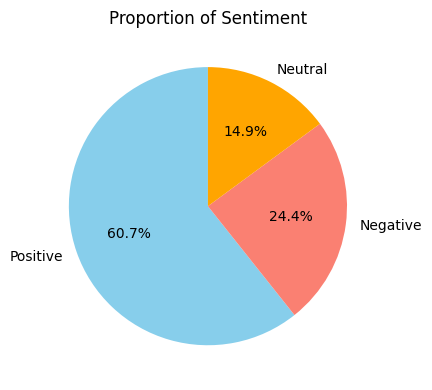

In [79]:
# Pie Chart
plt.figure(figsize=(8, 4))
data['vader_sentiment_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon', 'orange'])
plt.title('Proportion of Sentiment', fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

## **Word Cloud**

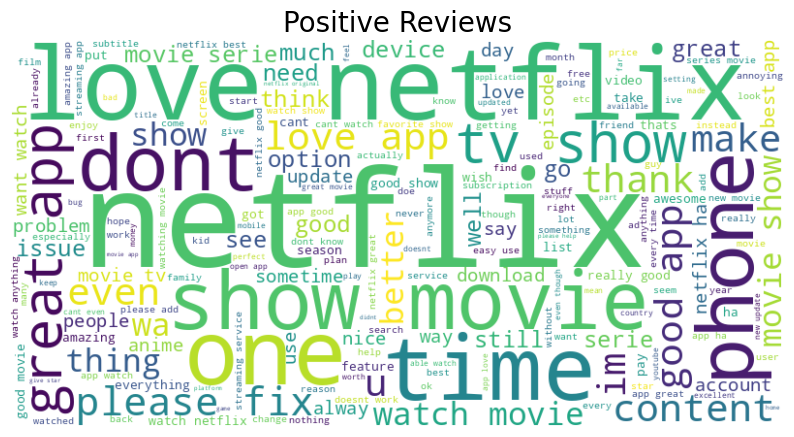

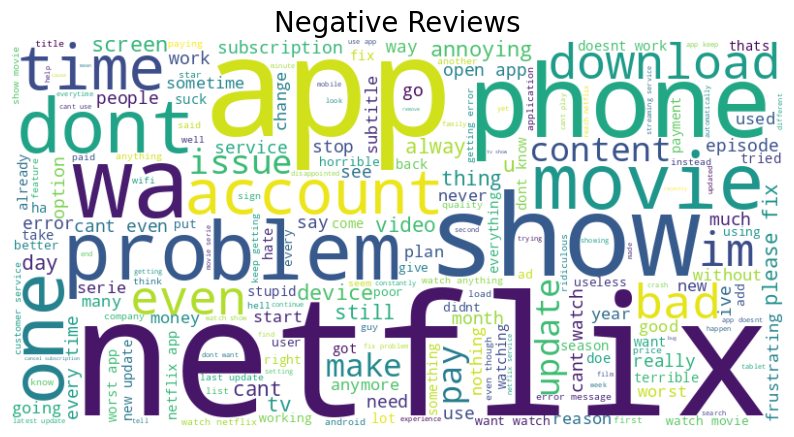

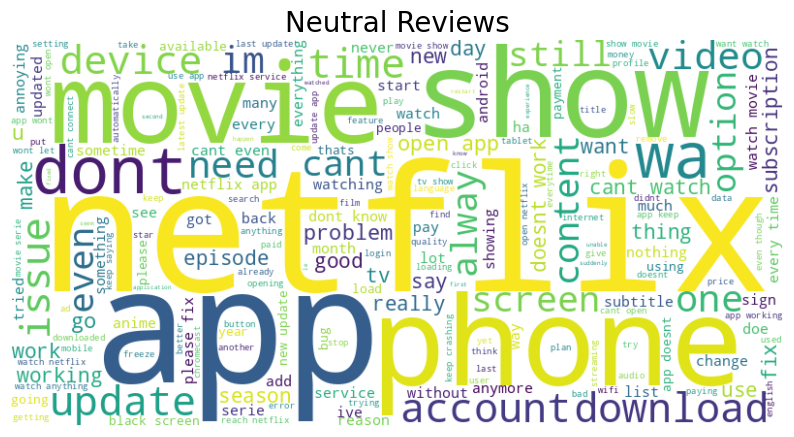

In [77]:
def create_wordcloud(text, title=None):
    # Join all text elements into a single string, handling potential lists within the Series
    all_text = " ".join( " ".join(text_item) if isinstance(text_item, list) else text_item for text_item in text)
    stop_words = set(STOPWORDS.union(set(stopwords.words('english'))))
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(all_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title, fontsize=20)
    plt.show()

# Create Word Clouds for each sentiment
positive_reviews = data[data['vader_sentiment_label'] == 'Positive']['content']
negative_reviews = data[data['vader_sentiment_label'] == 'Negative']['content']
neutral_reviews = data[data['vader_sentiment_label'] == 'Neutral']['content']

create_wordcloud(positive_reviews, "Positive Reviews")
create_wordcloud(negative_reviews, "Negative Reviews")
create_wordcloud(neutral_reviews, "Neutral Reviews")

# **FEATURE EXTRACTION**

## **CountVectorizer**

In [24]:
# Function Vectorizer
def vectorizer(text):
    # Convert text to string if it's not already
    if isinstance(text[0], list):
        text = [' '.join(doc) for doc in text]

    # Initialize CountVectorizer
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(text)
    return X, vectorizer

In [25]:
X_counts, count_vectorizer = vectorizer(data['content'])

## **Change to TF-IDF**

In [26]:
# Function to change representation to TF-IDF
def tfidf_transformer(X_counts):
    # Initialize TF-IDF Transformer
    transformer = TfidfTransformer()
    X_tfidf = transformer.fit_transform(X_counts)
    return X_tfidf

# Inisialize TF-IDF
X_tfidf = tfidf_transformer(X_counts)
print("TF-IDF Shape:", X_tfidf.shape)

TF-IDF Shape: (96753, 41499)


# **SPLIT DATA**

In [27]:
y = data['vader_sentiment_label_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [28]:
print(X_train.toarray()[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
print(X_test.toarray()[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [30]:
print(y_train.head())

86258    2
97186    2
72919    1
32864    2
70266    2
Name: vader_sentiment_label_encoded, dtype: int64


In [31]:
print(y_test.head())

69627    2
50960    2
43295    1
46308    2
38955    0
Name: vader_sentiment_label_encoded, dtype: int64


# **MODELLING**

## **Multinomial Logistic Regression**

### **Build Model**

In [34]:
# Build Model
model_mlg = LogisticRegression(multi_class='multinomial', solver='sag')

### **Train Model**

In [35]:
# Train Model
model_mlg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='sag')

## **Naive Bayes Multinomial**

### **Build Model**

In [41]:
# Build Model
model_nbm = MultinomialNB(alpha = 0.1, fit_prior = True, force_alpha = True)

### **Train Model**

In [42]:
# Train Model
model_nbm.fit(X_train, y_train)

MultinomialNB(alpha=0.1, force_alpha=True)

# **MODEL EVALUATION**

## **Multinomial Logistic Regression**

### **Predict**

In [36]:
# Predict
y_pred_mlg = model_mlg.predict(X_test)
y_pred_mlg

array([2, 2, 2, ..., 2, 2, 2])

### **Evaluation Metric**

In [37]:
# Evaluation Metric
print(f'Accuracy: {accuracy_score(y_test, y_pred_mlg)}')
print(f'Precision: {precision_score(y_test, y_pred_mlg, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_mlg, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred_mlg, average="weighted")}')

Accuracy: 0.8663118185106713
Precision: 0.8632832859321081
Recall: 0.8663118185106713
F1-Score: 0.8636941308678184


### **Probability**

In [38]:
# Probability
y_prob_mlg = model_mlg.predict_proba(X_test)
print(y_prob_mlg)

[[5.76087994e-03 3.57226507e-03 9.90666855e-01]
 [1.60832603e-01 2.20041119e-01 6.19126278e-01]
 [3.00586240e-01 3.42251495e-01 3.57162265e-01]
 ...
 [9.19213959e-04 3.81462273e-03 9.95266163e-01]
 [5.10586444e-02 7.07144892e-02 8.78226866e-01]
 [1.87108838e-02 3.44771787e-01 6.36517329e-01]]


### **ROC Score**

In [39]:
# ROC Score
mlg_roc_auc = roc_auc_score(y_test, y_prob_mlg, multi_class='ovr')
print(f'ROC AUC Score: {mlg_roc_auc}')

ROC AUC Score: 0.9342745316597897


### **ROC Curve**

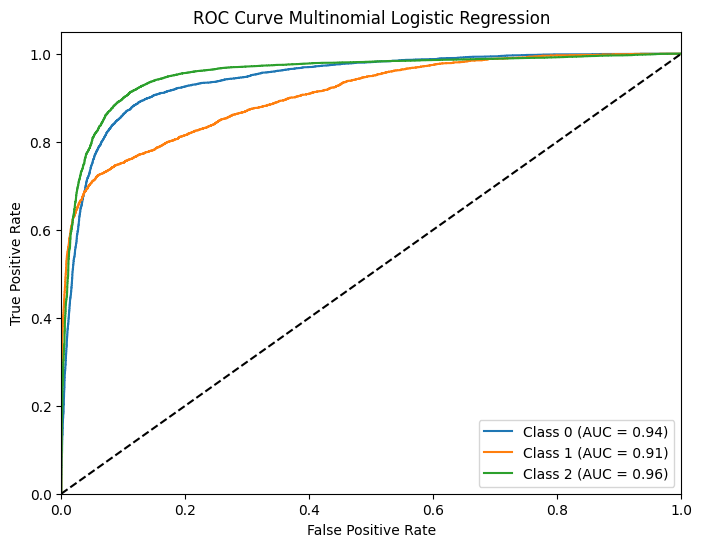

In [40]:
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model_mlg.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, model_mlg.predict_proba(X_test)[:, i])  # Use predict_proba for multi-class
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(model_mlg.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Multinomial Logistic Regression')
plt.legend(loc="lower right")
plt.show()

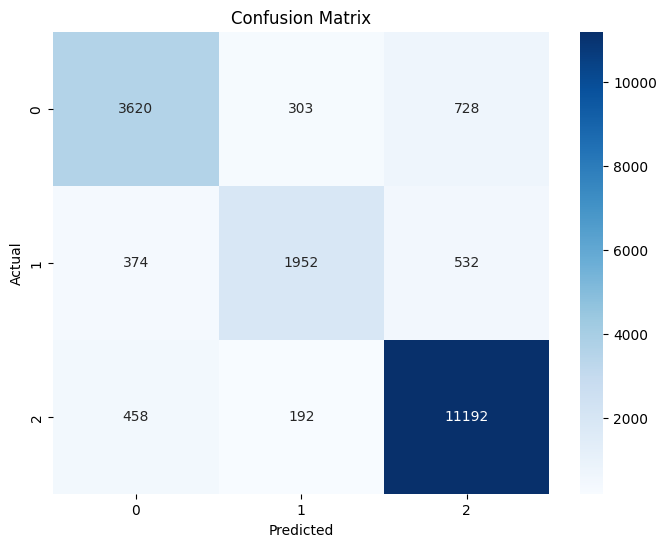

In [43]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_mlg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model_mlg.classes_, yticklabels=model_mlg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Classification Report
print(classification_report(y_test, y_pred_mlg))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      4651
           1       0.80      0.68      0.74      2858
           2       0.90      0.95      0.92     11842

    accuracy                           0.87     19351
   macro avg       0.84      0.80      0.82     19351
weighted avg       0.86      0.87      0.86     19351



## **Naive Bayes Multinomial**

### **Predict**

In [45]:
# Predict
y_pred_nbm = model_nbm.predict(X_test)
y_pred_nbm

array([2, 2, 2, ..., 2, 2, 2])

### **Evaluation Metric**

In [46]:
# Evaluation Metric
print(f'Accuracy: {accuracy_score(y_test, y_pred_nbm)}')
print(f'Precision: {precision_score(y_test, y_pred_nbm, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred_nbm, average="weighted")}')
print(f'F1-Score: {f1_score(y_test, y_pred_nbm, average="weighted")}')

Accuracy: 0.7132964704666426
Precision: 0.6951272883613688
Recall: 0.7132964704666426
F1-Score: 0.6832909348871076


### **Probability**

In [47]:
# Probability
y_prob_nbm = model_nbm.predict_proba(X_test)
print(y_prob_nbm)

[[0.11278605 0.03305678 0.85415718]
 [0.26886422 0.14568686 0.58544892]
 [0.24333911 0.11948955 0.63717134]
 ...
 [0.02878124 0.04273472 0.92848404]
 [0.0454971  0.01750802 0.93699488]
 [0.04959018 0.26163625 0.68877356]]


### **ROC Score**

In [48]:
# ROC Score
nbm_roc_auc = roc_auc_score(y_test, y_prob_nbm, multi_class='ovr')
print(f'ROC AUC Score: {nbm_roc_auc}')

ROC AUC Score: 0.8336913408882524


### **ROC Curve**

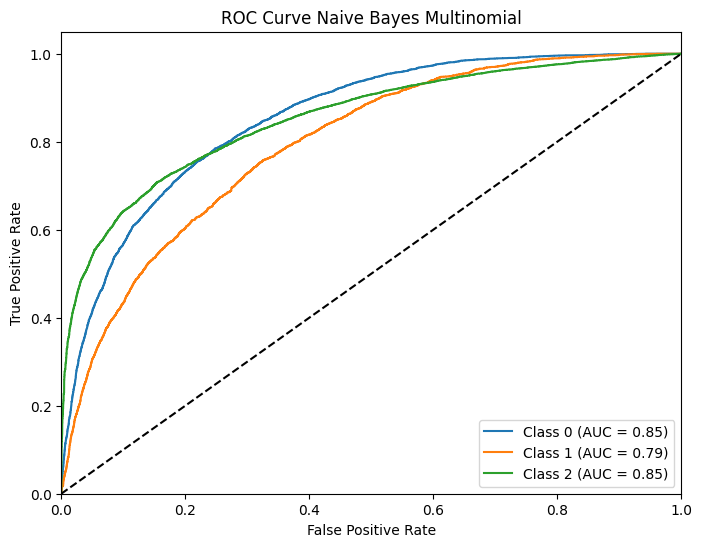

In [49]:
# ROC Curve
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model_nbm.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, model_nbm.predict_proba(X_test)[:, i])  # Use predict_proba for multi-class
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
for i in range(len(model_nbm.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Naive Bayes Multinomial')
plt.legend(loc="lower right")
plt.show()

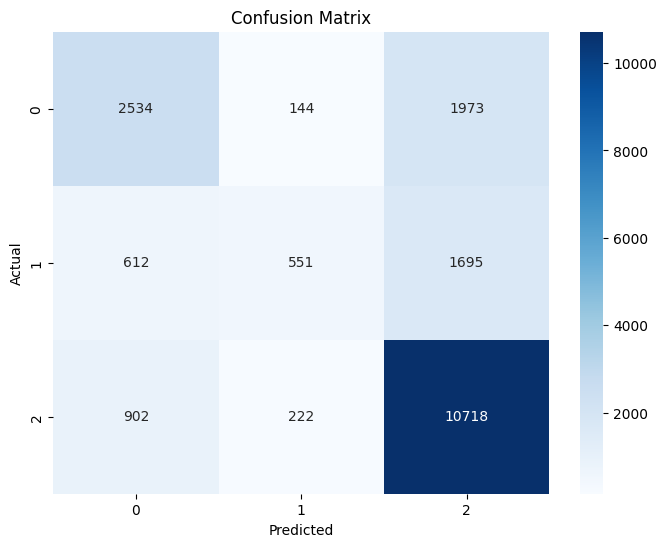

In [64]:
# Confusion Matrix
con_mat = confusion_matrix(y_test, y_pred_nbm)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues', xticklabels=model_nbm.classes_, yticklabels=model_nbm.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [65]:
# Classification Report
print(classification_report(y_test, y_pred_nbm))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58      4651
           1       0.60      0.19      0.29      2858
           2       0.75      0.91      0.82     11842

    accuracy                           0.71     19351
   macro avg       0.66      0.55      0.56     19351
weighted avg       0.70      0.71      0.68     19351



## **Score Comparison**

In [66]:
score_comparison = pd.DataFrame({'Model': ['Multinomial Logistic Regression', 'Naive Bayes Multinomial'],
                                'Accuracy': [accuracy_score(y_test, y_pred_mlg), accuracy_score(y_test, y_pred_nbm)],
                                'Precision': [precision_score(y_test, y_pred_mlg, average="weighted"), precision_score(y_test, y_pred_nbm, average="weighted"),],
                                'Recall': [recall_score(y_test, y_pred_mlg, average="weighted"), recall_score(y_test, y_pred_nbm, average="weighted")],
                                'F1-Score': [f1_score(y_test, y_pred_mlg, average="weighted"), f1_score(y_test, y_pred_nbm, average="weighted")],
                                'ROC AUC Score': [mlg_roc_auc, nbm_roc_auc]})
score_comparison

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC Score
0,Multinomial Logistic Regression,0.866312,0.863283,0.866312,0.863694,0.934275
1,Naive Bayes Multinomial,0.713296,0.695127,0.713296,0.683291,0.833691
